In [1]:
!pip install ppscore
!pip install catboost

In [2]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ppscore as pps
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
# Load data files
train_df=pd.read_csv("/content/Train (2).csv")
test_df=pd.read_csv("/content/Test (2).csv")
sub_df=pd.read_csv("/content/SampleSubmission (3).csv")
descp=pd.read_csv("/content/VariableDefinitions (1).csv")

In [4]:
descp

Column Name                                         Definition
0                      id                 Unique identifier for each tourist
1                 country                The country a tourist coming  from.
2               age_group                        The age group of a tourist.
3             travel_with  The relation of people a tourist travel with t...
4            total_female                            Total number of females
5              total_male                              Total number of males
6                 purpose                  The purpose of visiting  Tanzania
7           main_activity           The main activity of tourism in Tanzania
8            infor_source  The source of information about tourism in Tan...
9         tour_arrangment                The arrangment of visiting Tanzania
10  package_transport_int  If the tour package include international tran...
11   package_accomodation  If the tour package include accommodation service
12           package_food           If the tour package include food service
13   package_transport_tz  If the tour package include transport service ...
14    package_sightseeing    If the tour package include sightseeing service
15    package_guided_tour             If the tour package include tour guide
16      package_insurance      if the tour package include insurance service
17         night_mainland  Number of nights a tourist spent in Tanzania m...
18         night_zanzibar       Number of nights a tourist spent in Zanzibar
19           payment_mode            The mode of payment for tourism service
20          first_trip_tz                If it was a first  trip to Tanzania
21        most_impressing               what impressed a toursit in Tanzania
22             total_cost    The total tourist expenditure  in TZS(currency)

In [5]:
# check dataset shapes
print("Size of train",train_df.shape)
print("Size of test",test_df.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [6]:
# preview data
train_df.head()

ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement package_transport_int  \
0            Friends, relatives      Independent                    No   
1                        others      Independent                    No   
2            Friends, relatives      Independent                    No   
3  Travel, agent, tour operator     Package Tour                    No   
4  Travel, agent, tour operator      Independent                    No   

  package_accomodation package_food package_transport_tz package_sightseeing  \
0                   No           No                   No                  No   
1                   No           No                   No                  No   
2                   No           No                   No                  No   
3                  Yes          Yes                  Yes                 Yes   
4                   No           No                   No                  No   

  package_guided_tour package_insurance  night_mainland  night_zanzibar  \
0                  No                No            13.0             0.0   
1                  No                No            14.0             7.0   
2                  No                No             1.0            31.0   
3                 Yes                No            11.0             0.0   
4                  No                No             7.0             4.0   

  payment_mode first_trip_tz                       most_impressing  total_cost  
0         Cash            No                       Friendly People    674602.5  
1         Cash           Yes  Wonderful Country, Landscape, Nature   3214906.5  
2         Cash            No                  Excellent Experience   3315000.0  
3         Cash           Yes                       Friendly People   7790250.0  
4         Cash           Yes                           No comments   1657500.0

In [7]:
# assign categorical variables
cfi = train_df.drop(['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'ID', 'total_cost'], 1)

In [8]:
# check unique values
for col in train_df.columns:
  print(col, ' : ', train_df[col].unique())

ID  :  ['tour_0' 'tour_10' 'tour_1000' ... 'tour_995' 'tour_997' 'tour_999']
country  :  ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE'

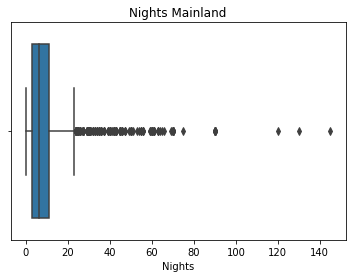

In [9]:
# checking outliers
sns.boxplot(x=train_df['night_mainland'])
plt.xlabel('Nights')
plt.title('Nights Mainland')
plt.show()

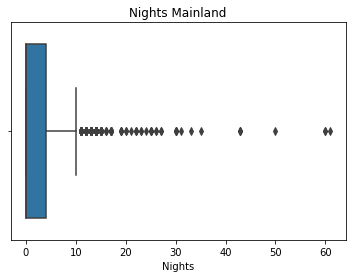

In [10]:
# checking outliers
sns.boxplot(x=train_df['night_zanzibar'])
plt.xlabel('Nights')
plt.title('Nights Mainland')
plt.show()

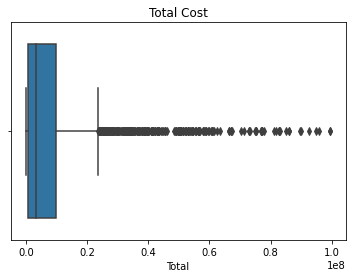

In [11]:
# checking outliers
sns.boxplot(x=train_df['total_cost'])
plt.xlabel('Total')
plt.title('Total Cost')
plt.show()

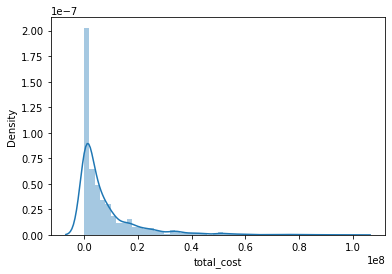

In [12]:
sns.distplot(train_df['total_cost'])
plt.show()

In [13]:
# check outliers
# #compute IQR to remove price outliers
# q1_diff, q3_diff = np.percentile(train_df['total_cost'], [10, 90])
# iqr_diff = q3_diff - q1_diff

# lower_diff = q1_diff - (1.5 * iqr_diff)
# upper_diff = q3_diff + (1.5 * iqr_diff)
# train_df_out = train_df.drop(train_df[train_df['total_cost'] > upper_diff].index)
# train_df_out = train_df_out.reset_index(drop=True)
# print(train_df.shape)
# print(train_df_out.shape)

## Exploratory Data Analysis

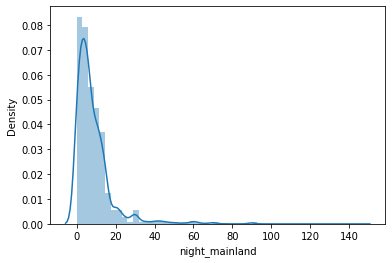

In [14]:
sns.distplot(train_df['night_mainland'])
plt.show()

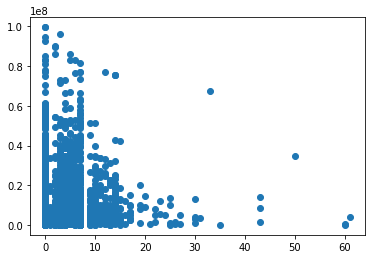

In [15]:
plt.scatter(x=train_df['night_zanzibar'], y=train_df['total_cost'])
plt.show()

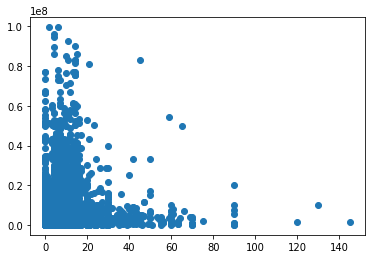

In [16]:
plt.scatter(x=train_df['night_mainland'], y=train_df['total_cost'])
plt.show()

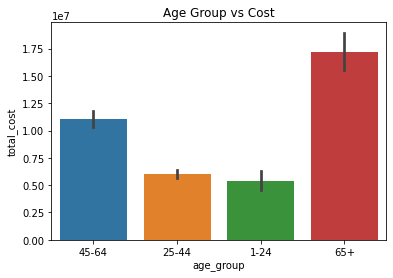

In [17]:
sns.barplot(x='age_group', y='total_cost', data=train_df)
plt.title('Age Group vs Cost')
plt.show()

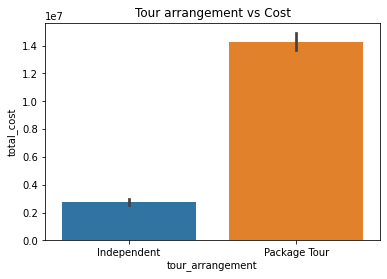

In [18]:
sns.barplot(x='tour_arrangement', y='total_cost', data=train_df)
plt.title('Tour arrangement vs Cost')
plt.show()

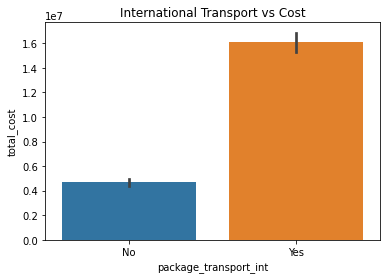

In [19]:
sns.barplot(x='package_transport_int', y='total_cost', data=train_df)
plt.title('International Transport vs Cost')
plt.show()

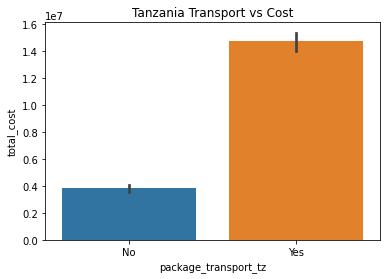

In [20]:
sns.barplot(x='package_transport_tz', y='total_cost', data=train_df)
plt.title('Tanzania Transport vs Cost')
plt.show()

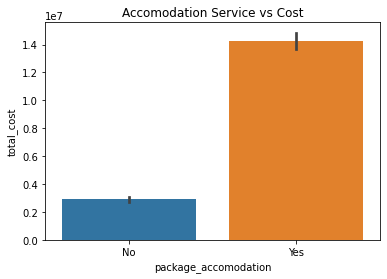

In [21]:
sns.barplot(x='package_accomodation', y='total_cost', data=train_df)
plt.title('Accomodation Service vs Cost')
plt.show()

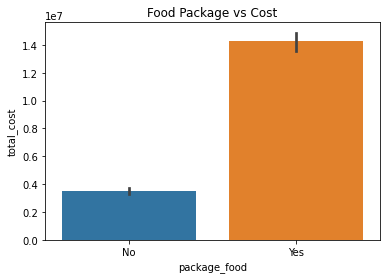

In [22]:
sns.barplot(x='package_food', y='total_cost', data=train_df)
plt.title('Food Package vs Cost')
plt.show()

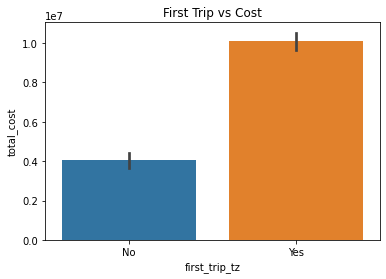

In [23]:
sns.barplot(x='first_trip_tz', y='total_cost', data=train_df)
plt.title('First Trip vs Cost')
plt.show()

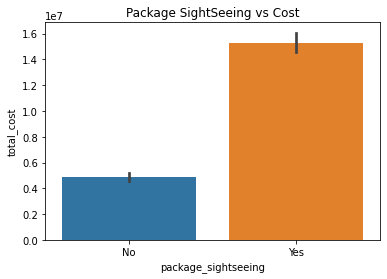

In [24]:
sns.barplot(x='package_sightseeing', y='total_cost', data=train_df)
plt.title('Package SightSeeing vs Cost')
plt.show()

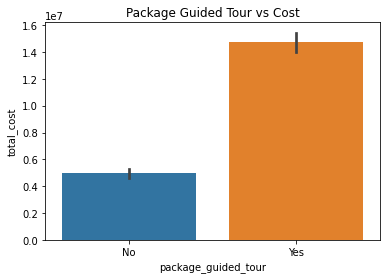

In [25]:
sns.barplot(x='package_guided_tour', y='total_cost', data=train_df)
plt.title('Package Guided Tour vs Cost')
plt.show()

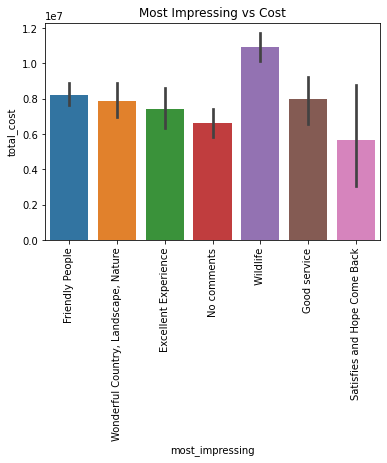

In [26]:
sns.barplot(x='most_impressing', y='total_cost', data=train_df)
plt.xticks(rotation=90)
plt.title('Most Impressing vs Cost')
plt.show()

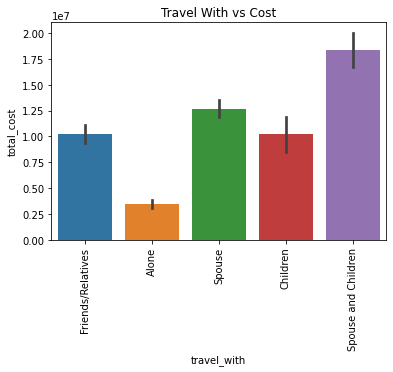

In [27]:
sns.barplot(x='travel_with', y='total_cost', data=train_df)
plt.xticks(rotation=90)
plt.title('Travel With vs Cost')
plt.show()

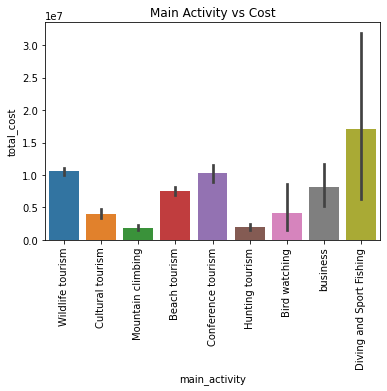

In [28]:
sns.barplot(x='main_activity', y='total_cost', data=train_df)
plt.xticks(rotation=90)
plt.title('Main Activity vs Cost')
plt.show()

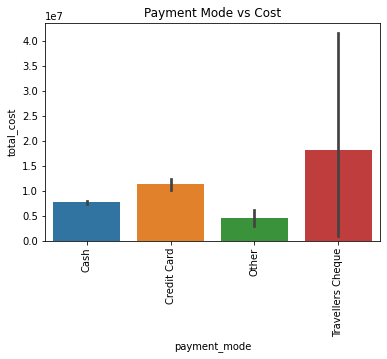

In [29]:
sns.barplot(x='payment_mode', y='total_cost', data=train_df)
plt.xticks(rotation=90)
plt.title('Payment Mode vs Cost')
plt.show()

In [30]:
pt = pd.pivot_table(train_df, values='total_cost', columns='country', aggfunc=np.mean).transpose().reset_index()
pt = pd.DataFrame(pt)
pt.sort_values(by='total_cost', ascending=False).head(10)

country    total_cost
23   DOMINICA  3.315000e+07
17  COSTARICA  2.718300e+07
82   SLOVENIA  1.906237e+07
93    TUNISIA  1.574625e+07
3   AUSTRALIA  1.474802e+07
21    DENMARK  1.456879e+07
40     ISRAEL  1.430542e+07
76     RUSSIA  1.358321e+07
14   COLOMBIA  1.331525e+07
90     TAIWAN  1.321396e+07

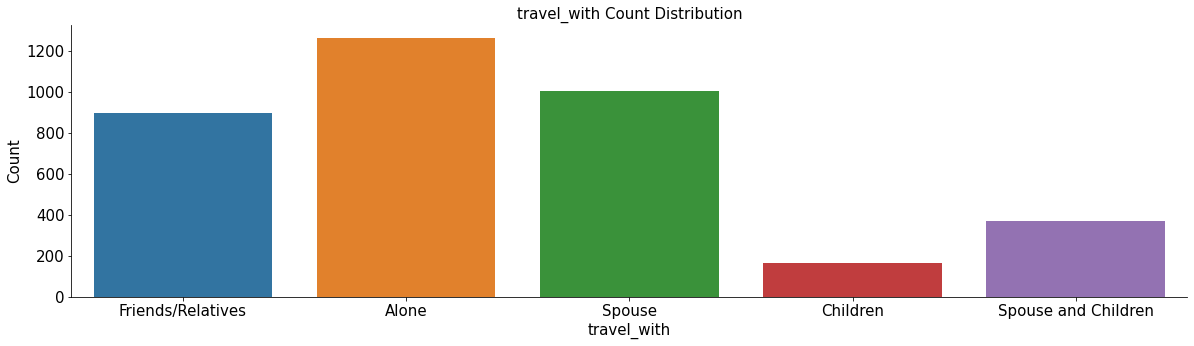

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train_df)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [32]:
#relationship between two categorical variables using a Two-way table
pd.crosstab(train_df['main_activity'], train_df['country'], margins=True)

country                   ALGERIA  ANGOLA  ARGENTINA  AUSTRALIA  AUSTRIA  \
main_activity                                                              
Beach tourism                   1       0          0         15        3   
Bird watching                   0       0          0          1        0   
Conference tourism              0       0          0         23        4   
Cultural tourism                0       1          0          9        2   
Diving and Sport Fishing        0       0          0          1        0   
Hunting tourism                 0       0          0          4        0   
Mountain climbing               0       0          0          0        1   
Wildlife tourism                1       0          1        131        7   
business                        0       0          0          2        1   
All                             2       1          1        186       18   

country                   BELGIUM  BERMUDA  BRAZIL  BURGARIA  BURUNDI  CANADA  \
main_activity                                                                   
Beach tourism                   7        0       1         1        9      24   
Bird watching                   1        0       0         0        0       0   
Conference tourism              1        0       1         0        0      15   
Cultural tourism                7        1       1         0       22       8   
Diving and Sport Fishing        0        0       0         0        0       0   
Hunting tourism                 4        0       0         1       16       3   
Mountain climbing               2        0       1         0        4       3   
Wildlife tourism               27        0       6         0       13      61   
business                        0        0       0         0        0       0   
All                            49        1      10         2       64     114   

country                   CAPE VERDE  CHILE  CHINA  COLOMBIA  COMORO  CONGO  \
main_activity                                                                 
Beach tourism                      0      0     19         1       1      0   
Bird watching                      0      0      0         0       0      0   
Conference tourism                 0      0      1         0       0      0   
Cultural tourism                   0      0      1         0       0      2   
Diving and Sport Fishing           0      0      0         0       0      0   
Hunting tourism                    0      0      2         0       0      5   
Mountain climbing                  1      0      3         0       0      1   
Wildlife tourism                   0      2     39         2       0      3   
business                           0      0      0         0       0      0   
All                                1      2     65         3       1     11   

country                   COSTARICA  CROATIA  CYPRUS  CZECH REPUBLIC  DENMARK  \
main_activity                                                                   
Beach tourism                     0        1       0               0       10   
Bird watching                     0        0       0               0        0   
Conference tourism                0        1       0               5        6   
Cultural tourism                  0        0       0               3        5   
Diving and Sport Fishing          0        0       0               0        0   
Hunting tourism                   0        0       0               0        3   
Mountain climbing                 0        0       1               0        0   
Wildlife tourism                  1        0       0               3       17   
business                          0        0       0               0        0   
All                               1        2       1              11       41   

country                   DJIBOUT  DOMINICA  DRC  EGYPT  ESTONIA  ETHIOPIA  \
main_activity                                                                
Beach tourism                   0   

In [34]:
data=pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [35]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [36]:
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [37]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [38]:
# create copy for catboost
data_copy = data.copy()

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])
data['tour_arrangement'] = le.fit_transform(data['tour_arrangement'])
data['travel_with'] = le.fit_transform(data['travel_with'])
data['purpose'] = le.fit_transform(data['purpose'])
data['main_activity'] = le.fit_transform(data['main_activity'])
data['info_source'] = le.fit_transform(data['info_source'])
data['most_impressing'] = le.fit_transform(data['most_impressing'])
data['payment_mode'] = le.fit_transform(data['payment_mode'])

In [41]:
data.head(2)

ID  country  age_group  travel_with  total_female  total_male  \
0   tour_0      101          3            2           1.0         1.0   
1  tour_10      111          2            3           1.0         0.0   

   purpose  main_activity  info_source  tour_arrangement  \
0        1              7            0                 0   
1        1              3            7                 0   

   package_transport_int  package_accomodation  package_food  \
0                      0                     0             0   
1                      0                     0             0   

   package_transport_tz  package_sightseeing  package_guided_tour  \
0                     0                    0                    0   
1                     0                    0                    0   

   package_insurance  night_mainland  night_zanzibar  payment_mode  \
0                  0            13.0             0.0             0   
1                  0            14.0             7.0             0   

   first_trip_tz  most_impressing  total_cost  
0              0                2    674602.5  
1              1                7   3214906.5

In [42]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

## convert float dtypes to int
data_copy["total_female"] = data_copy['total_female'].astype('int')
data_copy["total_male"] = data_copy['total_male'].astype('int')
data_copy["night_mainland"] = data_copy['night_mainland'].astype('int')
data_copy["night_zanzibar"] = data_copy['night_zanzibar'].astype('int')

In [43]:
# #feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]

# #feature engineering
data_copy["total_persons"] = data_copy["total_female"] + data_copy["total_male"]

data_copy["total_nights_spent"] = data_copy["night_mainland"] + data_copy["night_zanzibar"]


In [44]:
## separate data into train and test
train_df=data[data.total_cost.notnull()].reset_index(drop=True)
test_df=data[data.total_cost.isna()].reset_index(drop=True)

## separate data into train and test
train_copy=data[data_copy.total_cost.notnull()].reset_index(drop=True)
test_copy=data[data_copy.total_cost.isna()].reset_index(drop=True)

In [45]:
print(train_df.shape)
print(test_df.shape)

print(train_copy.shape)
print(test_copy.shape)

(4809, 25)
(1601, 25)
(4809, 25)
(1601, 25)


## Modelling

In [46]:
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target = train_df["total_cost"]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [48]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.2, random_state = 9)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3847, 23) (3847,)
(962, 23) (962,)


In [49]:
# from xgboost import XGBRegressor
# xgb1 = XGBRegressor()
# parameters = {"learning_rate": [0.1, 0.01, 0.001],
#                "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
#                "max_depth": [2, 4, 7, 10],
#                "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
#                "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
#                "reg_alpha": [0, 0.5, 1],
#                "reg_lambda": [1, 1.5, 2, 3, 4.5],
#                "min_child_weight": [1, 3, 5, 7],
#                "n_estimators": [100, 250, 500, 1000]}


# xgb_grid = RandomizedSearchCV(xgb1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         n_iter = 10,
#                         verbose=True)

# xgb_grid.fit(X_train, y_train)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [50]:
# implement xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor(n_estimators= 200,learning_rate = 0.008,max_depth =6)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

[08:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, y_pred)
print('Error {}'.format(mae))

Error 4150755.039836019


In [52]:
# predict and prepare submission file
sub = test_df[cols]
predictions_xgb  = xgb.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_xgb})
submission_df.to_csv('submit.csv',index=False)

In [89]:
# implement catboost
from catboost import CatBoostRegressor
model=CatBoostRegressor(n_estimators = 6000, depth=6, learning_rate=0.008, loss_function='MAE', eval_metric = 'RMSE')
model.fit(X_train, y_train,cat_features=cfi,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
1005:	learn: 9983208.9081496	test: 6972492.4659835	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1006:	learn: 9983100.4537318	test: 6972525.3276678	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1007:	learn: 9982692.3804284	test: 6972536.8573078	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1008:	learn: 9981737.9282722	test: 6972775.3788203	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1009:	learn: 9981712.4631337	test: 6972758.8237708	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1010:	learn: 9981663.7556431	test: 6972672.2040798	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1011:	learn: 9981161.1918484	test: 6972578.0031614	best: 6971726.3262883 (980)	total: 11.9s	remaining: 58.9s
1012:	learn: 9980590.0222029	test: 6972185.3108307	best: 6971726.3262883 (980)	total: 12s	remaining: 58.9s
1013:	learn: 9980569.5181051	test: 6972190.7481168	best: 6971726.3262883 (980)	

In [90]:
# predict and prepare submission file
sub = test_df[cols]
predictions_cat  = model.predict(sub)
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': predictions_cat})
submission_df.to_csv('cat_submit.csv',index=False)

In [91]:
ensemble = (predictions_cat + predictions_xgb) / 2

In [92]:
submission_df = pd.DataFrame({'ID': test_df.ID, 'total_cost': ensemble})
submission_df.to_csv('ens_submit.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The ensemble model ranks top 10 on the final leaderboard.